In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv('Dataset (2015 onwards).csv', parse_dates=['Date'])
df.head()

,Date,Year,Mean_Temperature (K),Mean Temperature (C),Extras,Count
0,2015-01-01,2015,289.598,16.448,NaN,1
1,2015-01-02,2015,291.769,18.619,NaN,2
2,2015-01-03,2015,291.775,18.625,NaN,3
3,2015-01-04,2015,291.240,18.090,NaN,4
4,2015-01-05,2015,289.311,16.161,NaN,5


In [3]:
df['Date'].min(), df['Date'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [4]:
df = df.groupby('Date')['Mean Temperature (C)'].sum().reset_index()

In [5]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=1826, freq=None)

In [6]:
y = df['Mean Temperature (C)'].resample('MS').mean()

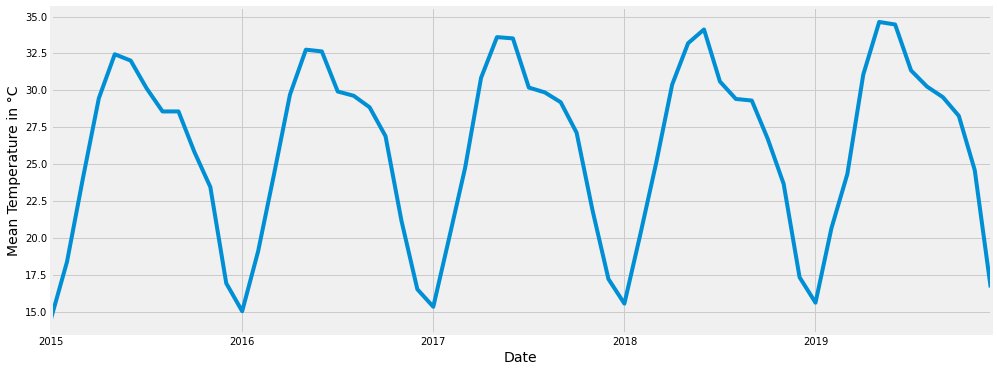

In [7]:
y.plot(figsize=(15, 6))
plt.ylabel('Mean Temperature in °C')
plt.show()

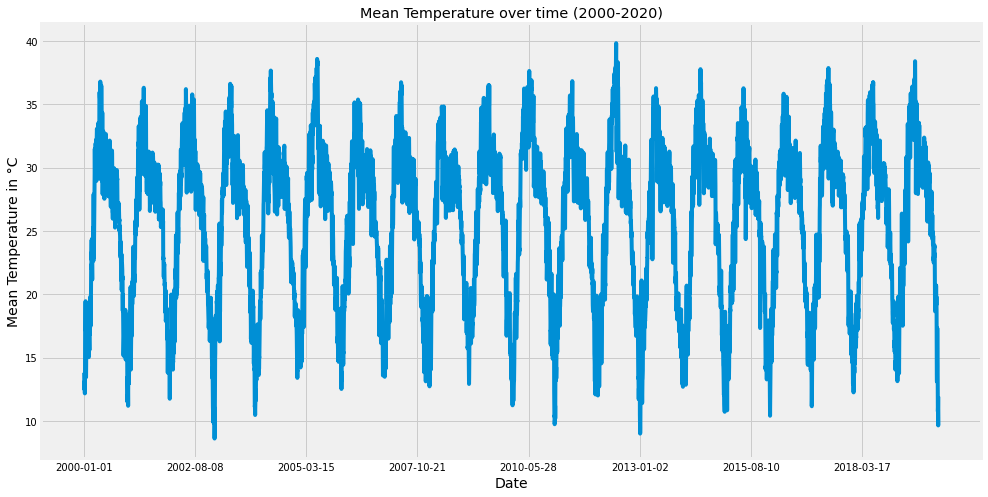

In [ ]:
#plt.figure(figsize=(15,8))
#plt.plot(df["Date"], df["Mean Temperature (C)"])
#plt.xticks(np.arange(0,7305, 950), df['Date'][0:7305:950])
#plt.title("Mean Temperature over time (2000-2020)")
#plt.xlabel("Date")
#plt.ylabel("Mean Temperature in °C")
#plt.show()

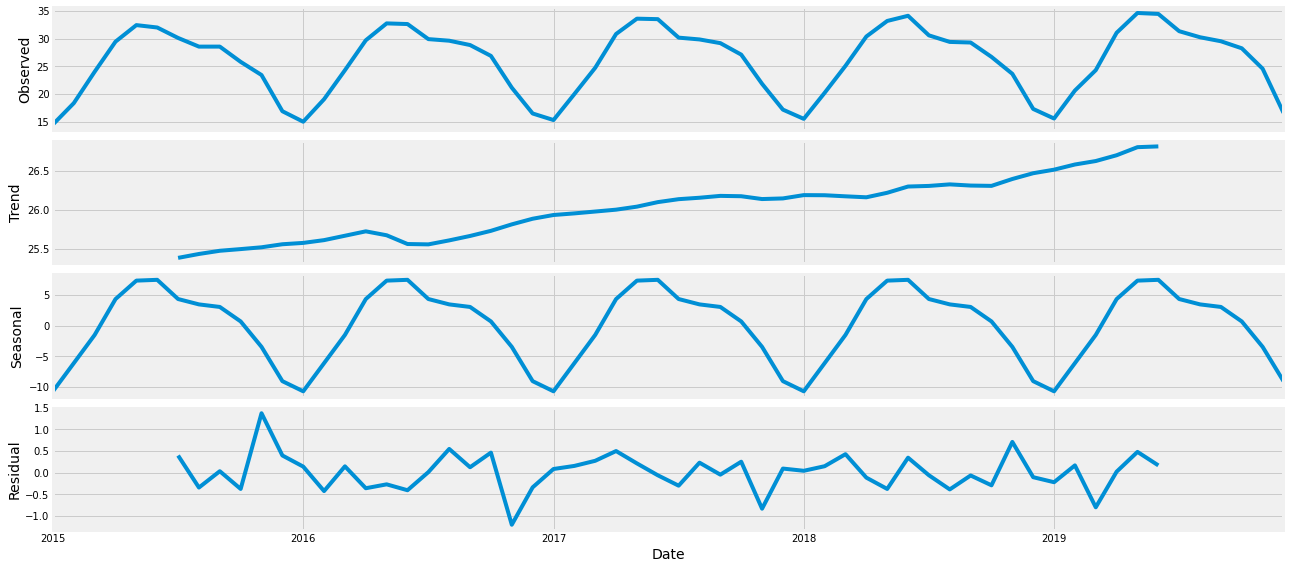

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()                                
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))                              
                                            
   

        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:557.7197644565014
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:447.804600924939
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:109.83030916037538


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1703.5215106607568
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:101.09844461106962
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:96.59999948989531
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:81.5582900126032


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1625.1876968301451
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:478.0673135798279
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:346.87581155614845
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:108.14420369845179


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1637.45124973517
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:103.05329386988089
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:94.39585333804001
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:80.1795171772119


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1643.1193103489438
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:317.6110685441943
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:219.91205575321214
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:129.00618543773794


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1382.3405141701892
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:132.80265692970875
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:129.93710959062156
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:89.04199165747417


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1184.778207053425
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:283.07922925450663
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:196.5697371216539
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:101.03726880418233


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1572.2454640958836
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:105.92999539584844


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:104.95149449069781
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:71.03075233225114


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1574.115075831637
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:324.9086345590424


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:262.9534394588144
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:109.59898249041592


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1450.006239997702
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:101.83182788206223


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:104.28557839779974
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:78.04540876729573


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1455.7821972486956
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:291.7585690965656


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:236.1512138523536
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:104.6755912465546


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1321.891944761579
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:103.59392224980354


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:105.59330817673182
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:73.20098509167529


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1327.5600076929857
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:284.43823573903666
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:197.47349385605045
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:119.12608270595742
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1432.9090757251788
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:121.01474128216003
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:119.00910843018951
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:81.5820630858675
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1434.774482218475
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:274.69419982229334
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:195.03191687796618
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:103.03375665835807


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1521.3386158825629
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:106.62876961149651
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:102.17590758103925
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:70.92422226456404
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1523.2079797425827


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0259      0.270     -0.096      0.924      -0.555       0.503
ma.L1         -1.0000    400.281     -0.002      0.998    -785.537     783.537
ar.S.L12      -0.1732      0.164     -1.058      0.290      -0.494       0.148
sigma2         0.3420    136.907      0.002      0.998    -267.991     268.675


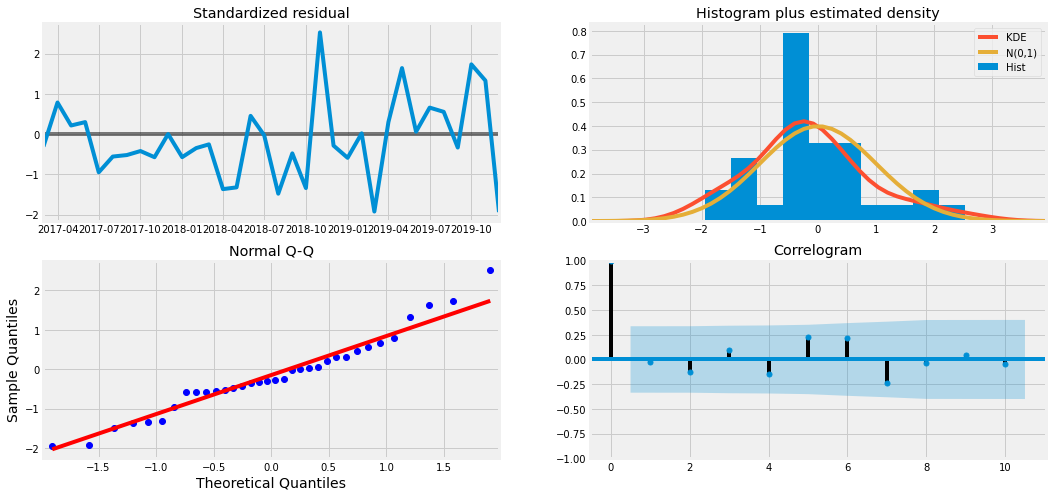

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

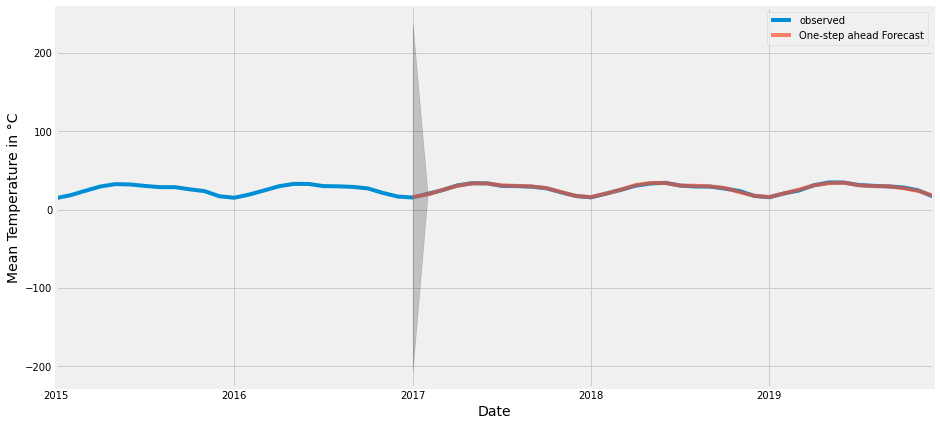

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Mean Temperature in °C')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.48


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.69


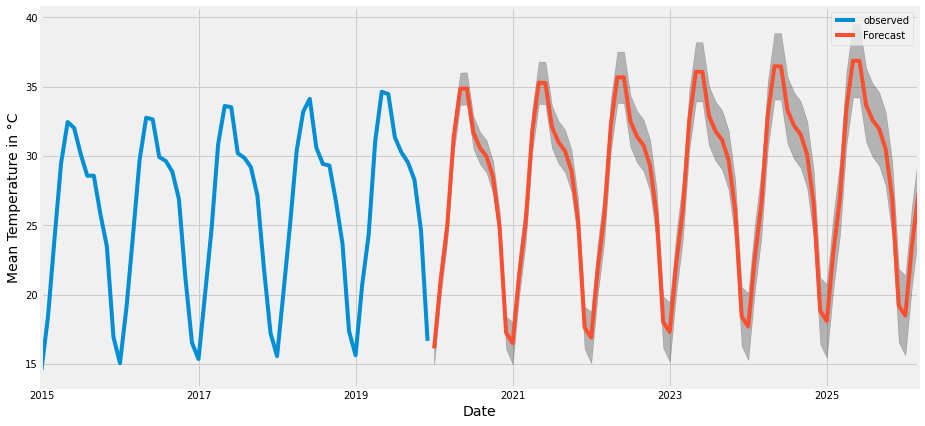

In [ ]:
pred_uc = results.get_forecast(steps=75)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Mean Temperature in °C')
plt.legend()
plt.show()

In [ ]:
pred_uc2 = results.get_forecast(steps=75)
pred_ci2 = pred_uc2.conf_int()
pred_ci2

,lower Mean Temperature (C),upper Mean Temperature (C)
2020-01-01,14.946053,17.270170
2020-02-01,19.893999,22.217266
2020-03-01,23.773440,26.096749
2020-04-01,30.255956,32.579264
2020-05-01,33.687705,36.011012
...,...,...
2025-11-01,24.264705,29.554614
2025-12-01,16.562471,21.852380
2026-01-01,15.606168,21.366390
2026-02-01,20.568666,26.325774


In [ ]:
res = pd.DataFrame(pred_ci2)
res.to_csv("Prediction_results (Seasonal ARIMA).csv")